## Sommaire

[1. Importation des librairies](#1.-Importation-des-librairies)

2. Importation des data frames et traitement des données

> [2.1. Sous nutrition](#2.1.-Importation-data-frames-sous-nutrition)

> [2.2. Disponibilité alimentaire](#2.2.-Disponibilité-alimentaire)

> [2.3. Population](#2.3.-Population])

> [2.4. Aide alimentaire](#2.4.-Aide-alimentaire)


3. Traitement des demandes de Marc

>  [3.1. La proportion de personnes en état de sous-nutrition](#3.1.-La-proportion-de-personnes-en-état-de-sous-nutrition)

>  [3-2. Le nombre théorique de personnes qui pourraient être nourries](#3-2.-Le-nombre-théorique-de-personnes-qui-pourraient-être-nourries)

>  [3.3. La disponibilité alimentaire des produits végétaux](#3.3.-La-disponibilité-alimentaire-des-produits-végétaux)

>  [3.4. L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine](#3.4.-L’utilisation-de-la-disponibilité-intérieure,-en-particulier-la-part-qui-est-attribuée-à-l’alimentation-animale,-celle-qui-est-perdue-et-celle-qui-est-concrètement-utilisée-pour-l'alimentation-humaine)

 4- Traitement des demandes de Mélanie


>  [4.1. Les pays pour lesquels la proportion de personnes sous alimentées est la plus forte en 2017](#4.1.-Les-pays-pour-lesquels-la-proportion-de-personnes-sous-alimentées-est-la-plus-forte-en-2017)

>  [4.2. Les pays qui ont le plus bénéficié d’aide depuis 2013](#4.2.-Les-pays-qui-ont-le-plus-bénéficié-d’aide-depuis-2013)

>  [4.3. Les pays ayant le plus/le moins de disponibilité/habitant](#4.3.-Les-pays-ayant-le-plus/le-moins-de-disponibilité/habitant)

 5- Traitement des demandes de Julien
 
>  [5.1. Équation exprimant le lien entre les 10 variables](#5.1.-Équation-exprimant-le-lien-entre-les-10-variables)

>  [5.2. Répartition de l’utilisation des céréales entre l’alimentation humaine et animale](#5.2.-Répartition-de-l’utilisation-des-céréales-entre-l’alimentation-humaine-et-animale)

>  [5.3. l’utilisation du manioc par la Thaïlande (Rapport entre la production et l’exportation)](#5.3.-l’utilisation-du-manioc-par-la-Thaïlande-(Rapport-entre-la-production-et-l’exportation))


[6. Conclusion](#6.-Conclusion)

### 1. Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 2.1. Importation data frames sous nutrition

In [2]:
sous_nutrition = pd.read_csv('sous_nutrition.csv')

In [3]:
# Aperçu des données importées

sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [4]:
# Aperçu des types des données importées

sous_nutrition.dtypes

Zone      object
Année     object
Valeur    object
dtype: object

In [5]:
# Aperçu des données manquantes

sous_nutrition.isnull().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

In [6]:
# Description des données

sous_nutrition.describe()

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2012-2014,<0.1
freq,6,203,120


In [7]:
# Remplacement des données manquantes par 0

sous_nutrition = sous_nutrition.fillna(0)
sous_nutrition.isnull().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

In [8]:
# Changer données '<0.1' en '0,01'

sous_nutrition.loc[sous_nutrition['Valeur'] == '<0.1'] = 0.01

In [9]:
# Modification type donnée de la série Valeur en type float

sous_nutrition['Valeur'] = sous_nutrition['Valeur'].astype(float)

In [10]:
modif_annee = ['2012-2014', '2013-2015', '2014-2016',
               '2015-2017', '2016-2018', '2017-2019']
annee = ['2013', '2014', '2015', '2016', '2017', '2018']
sous_nutrition['Année'] = sous_nutrition['Année'].replace(modif_annee, annee)

In [11]:
# Modification type donnée de la série Année en type int

sous_nutrition['Année'] = sous_nutrition['Année'].astype(int)

### 2.2. Importation data frames disponibilité alimentaire

In [12]:
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

In [13]:
# Aperçu des données importées

dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [14]:
# Aperçu des types des données importées

dispo_alimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [15]:
# Description des données

dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [16]:
# Aperçu des données manquantes

dispo_alimentaire.isnull().sum()

Zone                                                                 0
Produit                                                              0
Origine                                                              0
Aliments pour animaux                                            12885
Autres Utilisations                                              10109
Disponibilité alimentaire (Kcal/personne/jour)                    1364
Disponibilité alimentaire en quantité (kg/personne/an)            1590
Disponibilité de matière grasse en quantité (g/personne/jour)     3811
Disponibilité de protéines en quantité (g/personne/jour)          4044
Disponibilité intérieure                                           223
Exportations - Quantité                                           3379
Importations - Quantité                                            753
Nourriture                                                        1590
Pertes                                                           11327
Produc

In [17]:
# Remplacement des données manquantes par 0

dispo_alimentaire = dispo_alimentaire.fillna(0)
dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000,15605.000000
mean,83.578661,55.432426,31.748927,7.830948,0.969754,0.906513,631.143480,86.649023,83.053701,312.480487,29.073887,641.440564,9.912272,141.280807,-6.690292
std,1779.289153,3013.629812,102.961194,23.478909,3.246695,3.143516,9002.563666,933.435208,700.099451,4242.854724,584.672236,9270.864198,194.897843,3992.567621,362.380787
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,0.520000,0.020000,0.020000,6.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,18.000000,4.270000,0.310000,0.350000,73.000000,4.000000,16.000000,40.000000,0.000000,42.000000,0.000000,0.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


### 2.3. Importation data frames population

In [18]:
population = pd.read_csv('population.csv')

In [19]:
# Aperçu des données importées

population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [20]:
# Aperçu des types des données importées

population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [21]:
# Aperçu des données manquantes

population.isnull().sum()

Zone      0
Année     0
Valeur    0
dtype: int64

In [22]:
# Conversion unité Valeur, de milliers en million

population['Valeur'] = population['Valeur']*1000

### 2.4. Importation data frames aide alimentaire

In [23]:
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

In [24]:
# Aperçu des données importées

aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [25]:
# Aperçu des types des données importées

aide_alimentaire.dtypes

Pays bénéficiaire    object
Année                 int64
Produit              object
Valeur                int64
dtype: object

In [26]:
# Modification du nom de la série « Pays bénéficiaire » en « Zone »

aide_alimentaire = aide_alimentaire.rename(
    columns={'Pays bénéficiaire': 'Zone'})

In [27]:
# Aperçu des données manquantes

aide_alimentaire.isnull().sum()

Zone       0
Année      0
Produit    0
Valeur     0
dtype: int64

### 3.1. La proportion de personnes en état de sous-nutrition

In [28]:
# Calcul de la population mondiale en 2017

pop_tot_2017 = sum(population.loc[population['Année'] == 2017, 'Valeur'])

# Calcul de la population mondiale en sous nutrition en 2017

pop_sous_nu_2017 = sum(
    sous_nutrition.loc[sous_nutrition['Année'] == 2017, 'Valeur'])

# Calcul de la proportion de personnes en état de sous-nutrition

proportion_sous_alim_2017 = round(pop_sous_nu_2017*1000000/pop_tot_2017*100, 2)

print("La population mondiale en 2017 était de", round(
    pop_tot_2017/1000000000, 2), "milliards de personnes\n")
print("La population mondiale en état de sous-nutrition en 2017 était de",
      pop_sous_nu_2017, "millions de personnes\n")
print("La proportion de personnes en état de sous-nutrition en 2017 était de",
      proportion_sous_alim_2017, '% de la population mondiale')

La population mondiale en 2017 était de 7.55 milliards de personnes

La population mondiale en état de sous-nutrition en 2017 était de 535.7 millions de personnes

La proportion de personnes en état de sous-nutrition en 2017 était de 7.1 % de la population mondiale


### 3.2. Le nombre théorique de personnes qui pourraient être nourries

In [29]:
# Création data frames population pour l'année 2017

population_2017 = population.loc[population['Année'] == 2017]

# Jointure entre df disponibilité alimentaire et population pour l'année 2017

dispo_alimentaire = pd.merge(
    dispo_alimentaire, population_2017, on='Zone', how='inner')

# Création d'une serie permettant de calculer la disponibilité alimentaire journaliere de chaque pays

dispo_alimentaire['Disponibilité alimentaire (Kcal/jour/pays)'] = dispo_alimentaire[
    'Disponibilité alimentaire (Kcal/personne/jour)']*dispo_alimentaire['Valeur']

In [30]:
# Besoin calorique journalier=2500 (https://www.santemagazine.fr/alimentation/acheter-et-cuisiner/repas-equilibre/comment-calculer-vos-besoins-journaliers-en-calories-267433)

dispo_alimentaire_2017 = round(
    dispo_alimentaire['Disponibilité alimentaire (Kcal/jour/pays)'].sum()/2500)

print("La disponibilité alimentaire pour l'année 2017 pouvait nourrir", round(dispo_alimentaire_2017/1000000000, 2),
      "milliards de personnes, soit", round(dispo_alimentaire_2017/pop_tot_2017, 2), "fois", "\n", "la polulation mondiale")

La disponibilité alimentaire pour l'année 2017 pouvait nourrir 8.37 milliards de personnes, soit 1.11 fois 
 la polulation mondiale


### 3.3. La disponibilité alimentaire des produits végétaux

In [31]:
# Filtrage des produits de type végétal

dispo_alimentaire_vetegaux = dispo_alimentaire.loc[dispo_alimentaire['Origine'] == 'vegetale']

In [32]:
dispo_vetegaux = round(
    dispo_alimentaire_vetegaux['Disponibilité alimentaire (Kcal/jour/pays)'].sum()/2500)
print("La disponibilité alimentaire des aliments végétaux pour l'année 2017 pouvait nourrir", round(dispo_vetegaux /
      1000000000, 2), "milliards de personnes, \n soit", round(dispo_vetegaux/pop_tot_2017, 2), "fois la polulation mondiale")

La disponibilité alimentaire des aliments végétaux pour l'année 2017 pouvait nourrir 6.9 milliards de personnes, 
 soit 0.91 fois la polulation mondiale


### 3.4. L’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine

In [33]:
# Calcul somme aliments pour animaux

som_alim_anim = round(dispo_alimentaire['Aliments pour animaux'].sum())

In [34]:
# Calcul somme disponibilité interieure

dispo_int = round(dispo_alimentaire['Disponibilité intérieure'].sum())

In [35]:
# Part de l'alimentation animale dans la disponibilité intérieure

part_alim_anim = round((som_alim_anim/dispo_int)*100, 2)

print("La part de l'alimentation animale dans la disponibilité intérieure était de", part_alim_anim ,"%")

La part de l'alimentation animale dans la disponibilité intérieure était de 13.23 %


In [36]:
# Part des pertes
# Calcul somme des pertes

som_pertes = round(dispo_alimentaire['Pertes'].sum())

part_pertes = round((som_pertes/dispo_int)*100, 2)

print("La part des pertes dans la disponibilité intérieure était de", part_pertes,"%")

La part des pertes dans la disponibilité intérieure était de 4.65 %


In [37]:
# Part de l'alimentation humaine

som_nourriture = round(dispo_alimentaire['Nourriture'].sum())

part_nourriture = round((som_nourriture/dispo_int)*100, 2)

print("La part de l'alimentation humaine dans la disponibilité intérieure était de",
      part_nourriture, "%")

La part de l'alimentation humaine dans la disponibilité intérieure était de 49.37 %


(13.23, 49.37, 4.65, 32.75)
<module 'matplotlib.pyplot' from '/Users/yacou/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>


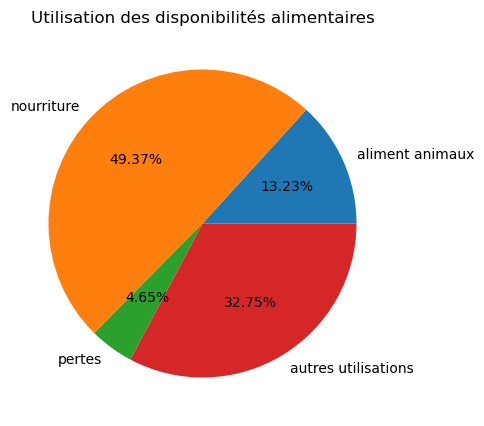

In [38]:
plt.figure(figsize=(30, 5))
autres = 32.75
x = part_alim_anim, part_nourriture, part_pertes, autres
plt.pie(x, labels=['aliment animaux', 'nourriture',
        'pertes', 'autres utilisations'], autopct='%.2f%%')
plt.title('Utilisation des disponibilités alimentaires')
sns.set_palette('pastel')
print(x)
print(plt)

### 4.1. Les pays pour lesquels la proportion de personnes sous alimentées est la plus forte en 2017

In [39]:
# Creation data frames sous nutrition pour l'année 2017

sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition['Année'] == 2017]

In [40]:
# Jointure entre les datas frames sous nutrition pour l'année 2017 et la population pour l'année 2017

df_sous_nutrition_2017 = pd.merge(sous_nutrition_2017, population_2017, on=[
                                  'Zone', 'Année'], how='inner')

In [41]:
# Renommage des series Valeur_x et Valeur_y

df_sous_nutrition_2017 = df_sous_nutrition_2017.rename(
    columns={'Valeur_x': 'NB personnes en sous nutrition', 'Valeur_y': 'Population totale'})

In [42]:
# Calcul proportion de sous alimentation pour chaque pays

df_sous_nutrition_2017['Proportion sous alimentation'] = round(
    (df_sous_nutrition_2017['NB personnes en sous nutrition']/df_sous_nutrition_2017['Population totale']*1000000)*100, 2)

In [43]:
# Liste des pays pour lesquels la proportion de personnes sous-alimentées est la plus forte

df_sous_nutrition_2017.sort_values(
    'Proportion sous alimentation', ascending=False, inplace=True)
df_sous_nutrition_2017 = df_sous_nutrition_2017[[
    'Zone', 'Proportion sous alimentation']].head(10).reset_index(drop=True)

In [44]:
display(df_sous_nutrition_2017)

,Zone,Proportion sous alimentation
0,Haïti,48.26
1,République populaire démocratique de Corée,47.19
2,Madagascar,41.06
3,Libéria,38.28
4,Lesotho,38.25
5,Tchad,37.96
6,Rwanda,35.06
7,Mozambique,32.81
8,Timor-Leste,32.17
9,Afghanistan,28.93


Text(0.5, 1.0, 'Pays ou la proportion de population en sous nutrition est la plus forte')

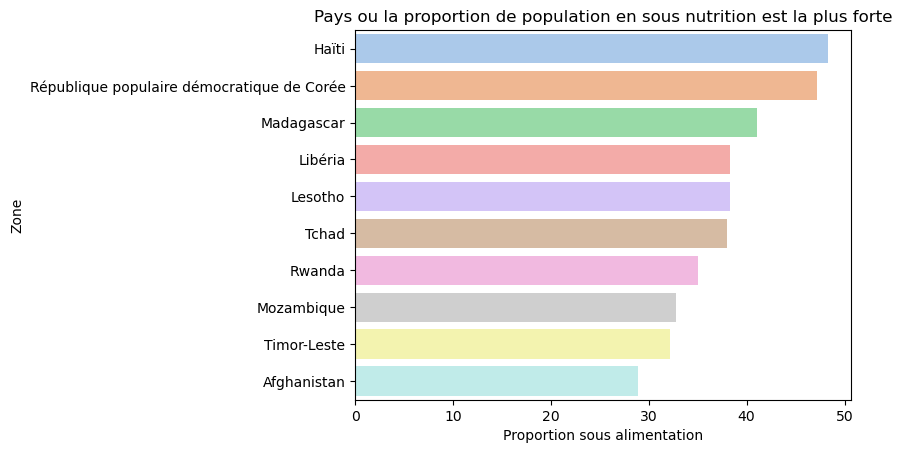

In [45]:
sns.barplot(data=df_sous_nutrition_2017,
            x=df_sous_nutrition_2017['Proportion sous alimentation'], y=df_sous_nutrition_2017['Zone'])
sns.set_palette('dark')
plt.title('Pays ou la proportion de population en sous nutrition est la plus forte')

### 4.2. Les pays qui ont le plus bénéficié d’aide depuis 2013

In [46]:
# Creation data frames pour les aides pour l'année 2017

aide_alimentaire_2013 = aide_alimentaire.loc[aide_alimentaire['Année'] >= 2013]

In [47]:
# Renommer la serie 'Valeur' en  'Quantité donnée (en tonnes)

aide_alimentaire_2013.rename(
    columns={'Valeur': 'Quantité donnée (en tonnes)'}, inplace=True)

# Agregation

aide_alimentaire_2013 = aide_alimentaire_2013.groupby(
    'Zone').sum("Quantité donnée (en tonnes)")

# Tri decroissant

aide_alimentaire_2013.sort_values(
    'Quantité donnée (en tonnes)', ascending=False, inplace=True)

aide_alimentaire_2013 = aide_alimentaire_2013[[
    'Quantité donnée (en tonnes)']].head(10)

In [48]:
aide_alimentaire_2013['Zone'] = aide_alimentaire_2013.index
aide_alimentaire_2013.reset_index(drop=True)

,Quantité donnée (en tonnes),Zone
0,1858943,République arabe syrienne
1,1381294,Éthiopie
2,1206484,Yémen
3,695248,Soudan du Sud
4,669784,Soudan
5,552836,Kenya
6,348188,Bangladesh
7,292678,Somalie
8,288502,République démocratique du Congo
9,276344,Niger


Text(0.5, 1.0, 'Les pays qui ont le plus bénéficié d’aide depuis 2013')

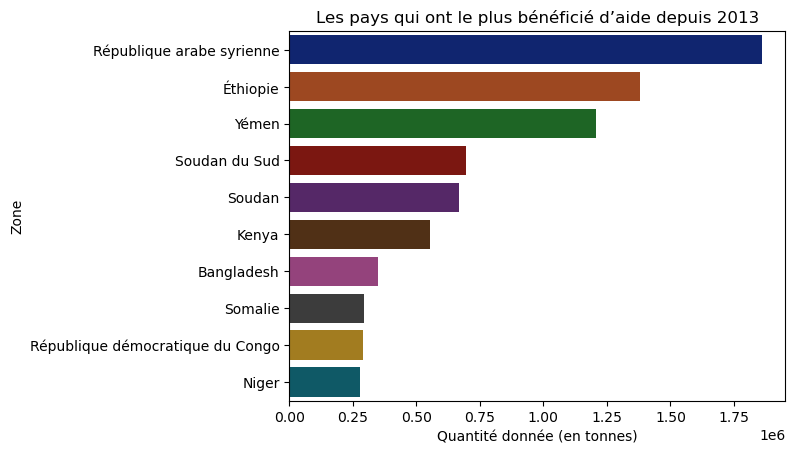

In [49]:
sns.barplot(data=aide_alimentaire_2013,
            x=aide_alimentaire_2013["Quantité donnée (en tonnes)"], y=aide_alimentaire_2013['Zone'])
sns.set_palette('dark')
plt.title('Les pays qui ont le plus bénéficié d’aide depuis 2013')

### 4.3. Les pays ayant le plus/le moins de disponibilité/habitant

In [50]:
# Agregation

dispo_par_habit = dispo_alimentaire.groupby('Zone').sum(
    'Disponibilité alimentaire (Kcal/personne/jour)')

In [51]:
# Les 10 pays ayant le plus de disponibilité par habitant

dispo_par_habit_plus = dispo_par_habit.sort_values(
    'Disponibilité alimentaire (Kcal/personne/jour)', ascending=False, inplace=True)
dispo_par_habit_plus = dispo_par_habit[[
    'Disponibilité alimentaire (Kcal/personne/jour)']].head(10)
dispo_par_habit_plus['Zone'] = dispo_par_habit_plus.index
dispo_par_habit_plus.reset_index(drop=True)
dispo_par_habit_plus

,Disponibilité alimentaire (Kcal/personne/jour),Zone
Zone,,
Autriche,3770.0,Autriche
Belgique,3737.0,Belgique
Turquie,3708.0,Turquie
États-Unis d'Amérique,3682.0,États-Unis d'Amérique
Israël,3610.0,Israël
Irlande,3602.0,Irlande
Italie,3578.0,Italie
Luxembourg,3540.0,Luxembourg
Égypte,3518.0,Égypte


Text(0.5, 1.0, 'Les 10 pays ayant le plus de disponibilité par habitant')

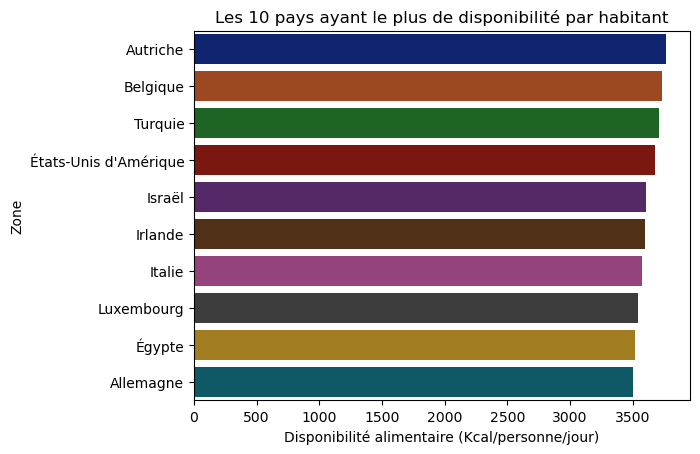

In [52]:
sns.barplot(data=dispo_par_habit_plus,
            y=dispo_par_habit_plus['Zone'], x=dispo_par_habit_plus['Disponibilité alimentaire (Kcal/personne/jour)'])
sns.set_palette('dark')
plt.title('Les 10 pays ayant le plus de disponibilité par habitant')

In [53]:
# Les 10 pays ayant le moins de disponibilité par habitant

dispo_par_habit_moins = dispo_par_habit.sort_values(
    'Disponibilité alimentaire (Kcal/personne/jour)', ascending=True, inplace=True)
dispo_par_habit_moins = dispo_par_habit[[
    'Disponibilité alimentaire (Kcal/personne/jour)']].head(10)
dispo_par_habit_moins['Zone'] = dispo_par_habit_moins.index
dispo_par_habit_moins.reset_index(drop=True)
dispo_par_habit_moins

,Disponibilité alimentaire (Kcal/personne/jour),Zone
Zone,,
République centrafricaine,1879.0,République centrafricaine
Zambie,1924.0,Zambie
Madagascar,2056.0,Madagascar
Afghanistan,2087.0,Afghanistan
Haïti,2089.0,Haïti
République populaire démocratique de Corée,2093.0,République populaire démocratique de Corée
Tchad,2109.0,Tchad
Zimbabwe,2113.0,Zimbabwe
Ouganda,2126.0,Ouganda


Text(0.5, 1.0, 'Les 10 pays ayant le moins de disponibilité par habitant')

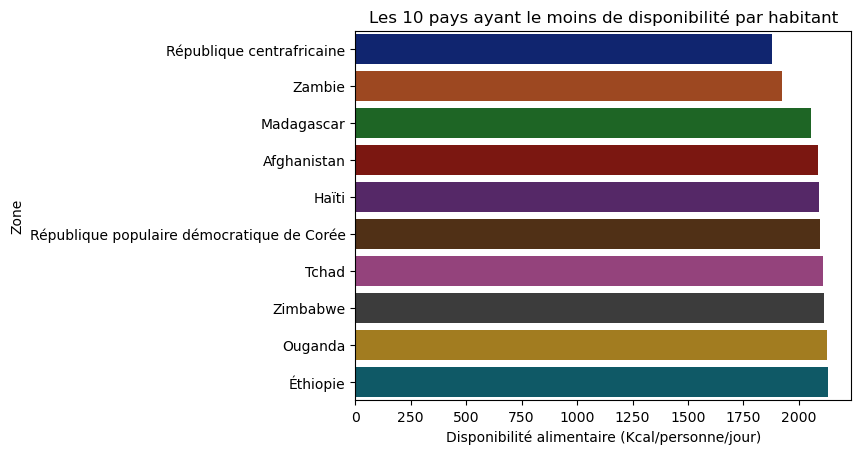

In [54]:
sns.barplot(data=dispo_par_habit_moins,
            y=dispo_par_habit_moins['Zone'], x=dispo_par_habit_moins['Disponibilité alimentaire (Kcal/personne/jour)'])
sns.set_palette('dark')
plt.title('Les 10 pays ayant le moins de disponibilité par habitant')

### 5. Traitement des demandes de Julien

### 5.1. Équation exprimant le lien entre les 10 variables

### Production + Importations - Exportations + Variation de stock = Disponibilité intérieure = Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations

### 5.2. Répartition de l’utilisation des céréales entre l’alimentation humaine et animale

In [55]:
# Importation data frames des céréales

df_cereales = pd.read_csv('alimentaire céréales.csv')

In [56]:
# Creation d'une liste contenant la liste des produits céreales

liste_cereales = df_cereales['Produit'].unique().tolist()

In [57]:
# Creation d'un data frames contenant que les cereales

cereales = dispo_alimentaire[dispo_alimentaire['Produit'].isin(liste_cereales)]

In [58]:
# Somme totale des céréales destinées à l'alimentation des animaux

cereales_anim = sum(cereales['Aliments pour animaux'])

# Somme totale des céréales destinées à l'alimentation humaine

cereales_nourriture = sum(cereales['Nourriture'])

# Somme totale des céréales

total_cereales = sum(cereales['Disponibilité intérieure'])

#print("En 2017, la disponibilité intérieure mondiale en céréale était de", total_cereales, "tonnes.\n")
#print(cereales_anim, "tonnes étaient destinées à l'alimentation animale, soit", round(cereales_anim/total_cereales*100,2),"% de la disponibilité interieure mondiale.\n")
#print("Et", cereales_nourriture, "tonnes étaient destinées à l'alimentation humaine, soit,", round(cereales_nourriture/total_cereales*100,2),"% de la disponibilité interieure mondiale.")

(69.67, 17.63, 12.7)
<module 'matplotlib.pyplot' from '/Users/yacou/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>


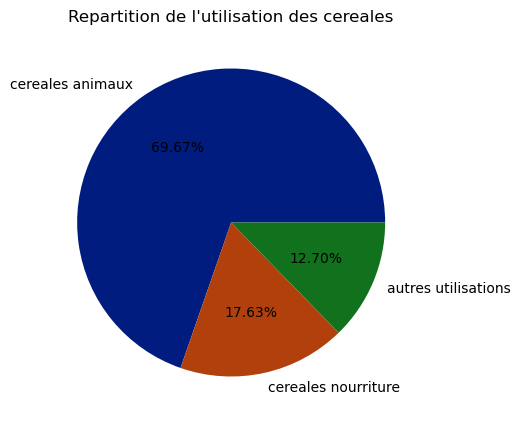

In [59]:
plt.figure(figsize=(30, 5))
autres = 12.7
x = round(cereales_anim/total_cereales*100,
          2), round(cereales_nourriture/total_cereales*100, 2), autres
plt.pie(x, labels=['cereales animaux', 'cereales nourriture',
        'autres utilisations'], autopct='%.2f%%')
plt.title("Repartition de l'utilisation des cereales")
sns.set_palette('pastel')
print(x)
print(plt)

### 5.3. l’utilisation du manioc par la Thaïlande (Rapport entre la production et l’exportation)

In [60]:
# Population de la Thaïlande 2017

pop_thai_2017 = sum(
    population_2017.loc[population_2017['Zone'] == 'Thaïlande', 'Valeur'])

# Population Thaïlande en sous nutrition en 2017

pop_thai_sous_nu_2017 = sum(
    sous_nutrition_2017.loc[sous_nutrition_2017['Zone'] == 'Thaïlande', 'Valeur'])

In [61]:
# Creation data frames pour la disponibilité alimentaire de la Thailande en 2017

dispo_alimentaire_manioc_2017 = dispo_alimentaire.loc[(dispo_alimentaire['Zone'] == 'Thaïlande') & (
    dispo_alimentaire['Produit'] == 'Manioc') & (dispo_alimentaire['Année'] == 2017)]

In [62]:
print("La population Thailandaise en 2017 était de", round(
    pop_thai_2017/1000000, 2), 'millions de personnes\n')
print("La population Thailandaise en état de sous nutrition en 2017 était de", pop_thai_sous_nu_2017,
      "millions de personnes, soit", round((pop_thai_sous_nu_2017*1000000)/pop_thai_2017*100, 2), "% de la population\n")
print("La production Thailandaise de manioc en 2017 était de",
      dispo_alimentaire_manioc_2017['Production'].sum(), "tonnes.\n")
print("L'exportation Thailandaise de manioc en 2017 était de", dispo_alimentaire_manioc_2017['Exportations - Quantité'].sum(), "tonnes. Soit", round(
    dispo_alimentaire_manioc_2017['Exportations - Quantité'].sum()/dispo_alimentaire_manioc_2017['Production'].sum()*100, 2), "% de la production")

La population Thailandaise en 2017 était de 69.21 millions de personnes

La population Thailandaise en état de sous nutrition en 2017 était de 6.2 millions de personnes, soit 8.96 % de la population

La production Thailandaise de manioc en 2017 était de 30228.0 tonnes.

L'exportation Thailandaise de manioc en 2017 était de 25214.0 tonnes. Soit 83.41 % de la production


### 6. Conclusion

### Au terme de nos différentes analyses, il en ressort que la disponibilité intérieure mondiale pour l'année 2017 était à même de pouvoir nourrir l’ensemble de la population mondiale, mais malheureusement 7,09% de la population était en état de sous nutrition.

### Nous avons également observé que les aides apportées aux pays n’étaient pas proportionnelles à la réalité de chaque pays. En effet si on prend la liste des 10 pays ayant le plus bénéficiés d’aides, et celle des pays ou la proportion de sous-alimentation est la plus élevée, on remarque qu’aucun pays de la dernière liste citée ne se trouve dans la première.

### On peut également noter une répartition inégale de certaines ressources, telle que les céréales dont 69,67% de la disponiblité interieure mondiale était destinée à l’alimentation animale, cela reste quand même élevé quand on voit le nombre de personne en état de sous nutrition.
### Sans oulier la Thailande qui avec 8,96% de sa population en état de sous nutrition exporte 83,41% de sa production de manioc

### Les raisons de la sous-alimentation peuvent être diverses et variés.
### Nous pouvons évoquer les conflits armés dans certains pays, le changement climatique qui touche le monde entier, et aussi la corruption qui est relative à la mauvaise gestion des dons à distribuer.
 
### Afin de faire baisser la proportion du nombre de personne en étant de sous nutrition, il serait idéal d’aider à hauteur les pays qui présentent les plus forts taux de personnes en état de sous nutrition, de militer pour un changement comportemental afin de faire ralentir les effets du changement climatique et surtout favoriser la mise en place d'un monde sans guerre.

[↟](#Sommaire)